In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('data.csv')

C:\Users\GerganaM\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
databg = data.loc[data['country_region_code']=='BG'].copy()
bgall = databg.loc[databg['sub_region_1'].isnull()]

In [10]:
eulist = ['BE', 'BG', 'CZ', 'DK', 'DE', 'EE', 'IE', 'EL', 'ES', 'FR', 'HR', 'IT', 'CY', 'LV', 'LT', 'LU', 'HU', 'MT', 'NL', 'AT', 'PL', 'PT', 'RO', 'SI', 'SK', 'FI', 'SE']

In [11]:
dataeu = data.loc[data['country_region_code'].isin(eulist)]

In [12]:
euall = dataeu.loc[dataeu['sub_region_1'].isnull()]

In [13]:
euall.index = pd.to_datetime(euall['date'])
collist = ['country_region', 'sub_region_1', 'sub_region_2']
for col in collist:
    euall = euall.drop(col, axis=1)
euall

,country_region_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
date,,,,,,,,
2020-02-15,AT,2020-02-15,9.0,1.0,42.0,13.0,0.0,-2.0
2020-02-16,AT,2020-02-16,15.0,21.0,42.0,12.0,1.0,-2.0
2020-02-17,AT,2020-02-17,9.0,5.0,35.0,3.0,-4.0,0.0
2020-02-18,AT,2020-02-18,8.0,5.0,40.0,2.0,-4.0,0.0
2020-02-19,AT,2020-02-19,4.0,2.0,10.0,-1.0,-5.0,1.0
...,...,...,...,...,...,...,...,...
2020-04-13,SK,2020-04-13,-92.0,-92.0,17.0,-80.0,-87.0,32.0
2020-04-14,SK,2020-04-14,-67.0,-12.0,-22.0,-56.0,-48.0,17.0
2020-04-15,SK,2020-04-15,-65.0,-13.0,5.0,-51.0,-45.0,18.0


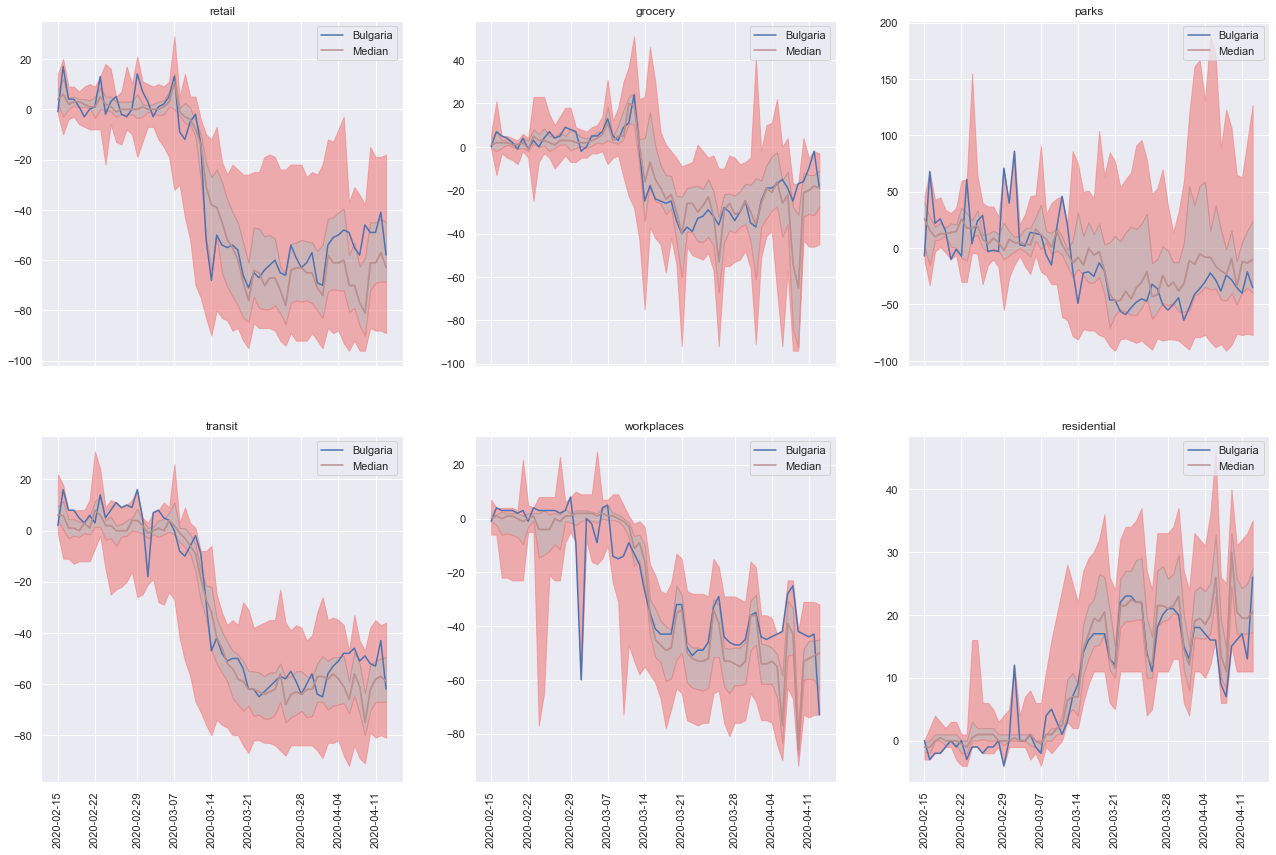

In [63]:
sns.set(font_scale=1) 
sns.set(rc={'figure.figsize':(22,14)})
types = ['retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline']
fig, axs = plt.subplots(2, 3, sharex=True)

for i in range(0, 2):
    for k in range(0, 3):
        curr = types[i*3+k]
        eu1 = euall[['country_region_code',curr]]
        eu1r = eu1.pivot(columns='country_region_code', values=curr)
        eu1r = eu1r.dropna(axis=1)
        eu1g = pd.DataFrame(columns=['Min', 'p25', 'Median', 'p75', 'Max', 'BG'])
        eu1g['Min'] = np.quantile(eu1r, 0, axis=1)
        eu1g['p25'] = np.quantile(eu1r, 0.25, axis=1)
        eu1g['Median'] = np.quantile(eu1r, 0.5, axis=1)
        eu1g['p75'] = np.quantile(eu1r, 0.75, axis=1)
        eu1g['Max'] = np.quantile(eu1r, 1, axis=1)
        eu1g.index = eu1r.index
        eu1g['SE'] = eu1r['SE']
        eu1g['BG'] = eu1r['BG']
        eu1g = eu1g.sort_index()
        #with pd.plotting.plot_params.use('x_compat', True):
        axs[i,k].fill_between(eu1g.index, eu1g['p75'], eu1g['Max'], color='lightcoral', alpha=0.6)
        axs[i,k].fill_between(eu1g.index, eu1g['Median'], eu1g['p75'], color='rosybrown', alpha=0.6)
        axs[i,k].fill_between(eu1g.index, eu1g['p25'], eu1g['Median'], color='rosybrown', alpha=0.6)
        axs[i,k].fill_between(eu1g.index, eu1g['Min'], eu1g['p25'], color='lightcoral', alpha=0.6)
        #axs[i,k].plot(eu1g.index, eu1g['SE'], color='darkred')
        axs[i,k].plot(eu1g.index, eu1g['BG'], color='b')
        axs[i,k].plot(eu1g.index, eu1g['Median'], color='rosybrown')
        axs[i,k].legend(['Bulgaria','Median'])
        axs[i,k].set_title(curr.split('_')[0])
        axs[i,k].set_xticklabels(eu1g.index.date[np.arange(0, len(eu1g.index),7)], rotation=90)